# Data Science and Web Mining - Bike Sharing Demand Prediction Problem - Report


## Information

<b>Kaagle Team Name:</b> "Team Single"  
<b>AUEB Registration ID:</b> 3140081  
<b>Full Name:</b> Koilakos, Panagiotis  


## Introduction

We are given a dataset which contains the hourly count of bike rentals over a period of 12,165 hours distributed in 731 days and we need to predict how many bikes will be rented each hour of the day, using various prediction models and techniques.

Everything started by considering 3 features (in the given example - project_undergrad) and we started building on this. The obvious and given approach was to use those 3 features (temperature, humidity and working day) and a Linear Regression Model, which was not giving satisfactory results in our first try.

We did numerous attempts and we kept only the two most successful per model and approach. The most successful used were removed from the code from simplicity but are included in Annex I (which was not a prerequisite but we thought it is good-to-have for further reference).

For the labor-intensive process of scoring calculation as well as graph creation, we created a custom function which we kept for the final submission in Annex I.


## Improvements Trough Model Change (Preliminary Results to Identify best model)


### Linear Model by changing features and test dataset percentage

By using Linear Model and changing the features and the dataset percentage we had several different results. The best linear model that we achieved was the linear model which was considering all features and we ended up with the below graph. Timing was 0.07s for predictions according to timeit.


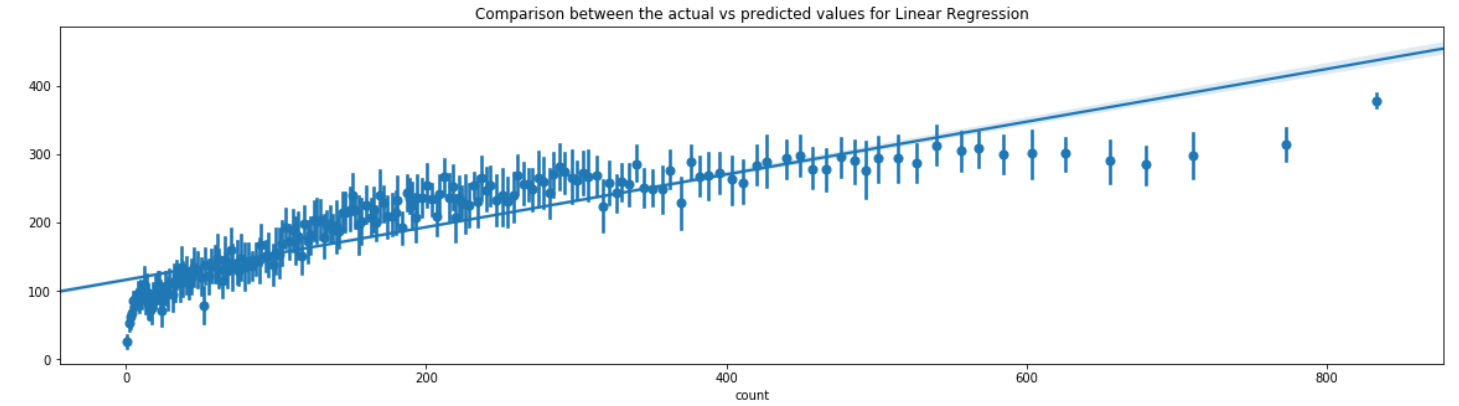


### Ridge, Lasso & Elastic Net Model by changing features and test dataset percentage


#### Ridge

By using Ridge Model and by changing the features and the dataset percentage we had several different results. The best ridge model that we achieved was the ridge model by considering all features and we ended up with the below graph.


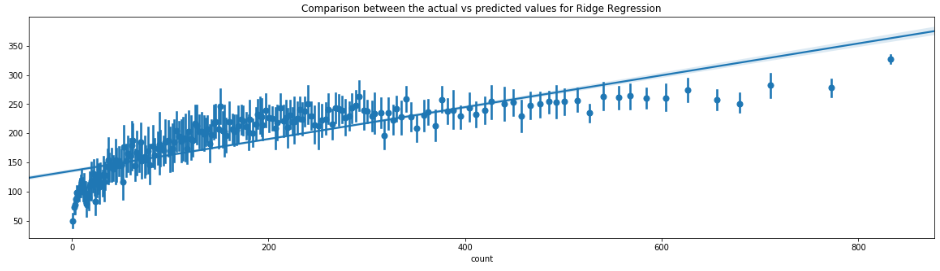


#### Lasso

By using Lasso Model and by changing features and the dataset percentage we had several different results. The best lasso model that we achieved was the lasso model by considering all features and we ended up with the below graph.


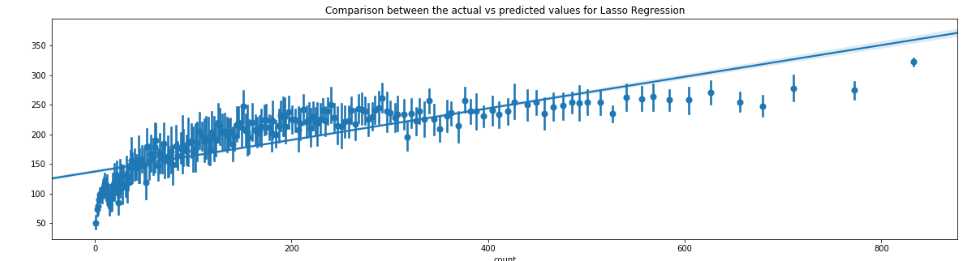


#### Elastic Net

By using Elastic Net Model and by changing features and the dataset percentage we had several different results. The best elastic net model that we achieved was the elastic net logarithmic by considering all features and we ended up with the below graph.


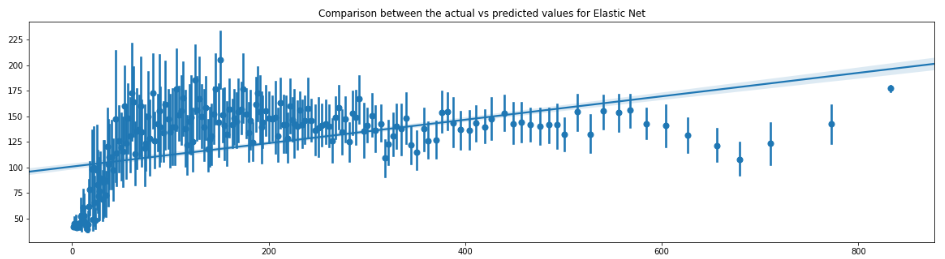

In general, it was noticed that by using log1p in the y_train cut the RMSLE score was becoming better but the graph deviations were greater for the above models.


### Random Forest Model

By using Random Forest Model, the improvement was apparent (RMSLE score was nearly 0.7 lower than the previous cases!). Again, we considered all features and used log1p. Time needed for predictions was 1.6s according to timeit.

We ended up with the below graph:


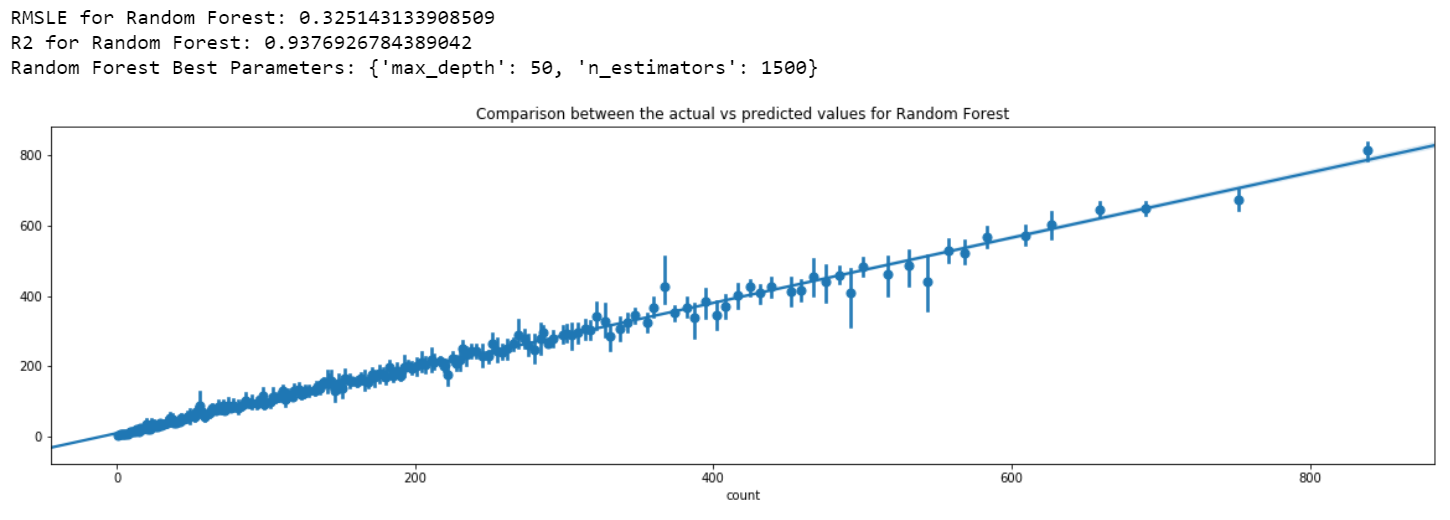

Random forest is also a dimensionality reduction technique.


### Gradient Boosting Model

By using Gradient Boosting Model, the improvement from the regression models was even greater. The best gradient boosting model that we achieved was the gradient boosting logarithmic by considering all features and we ended up with the graph below.


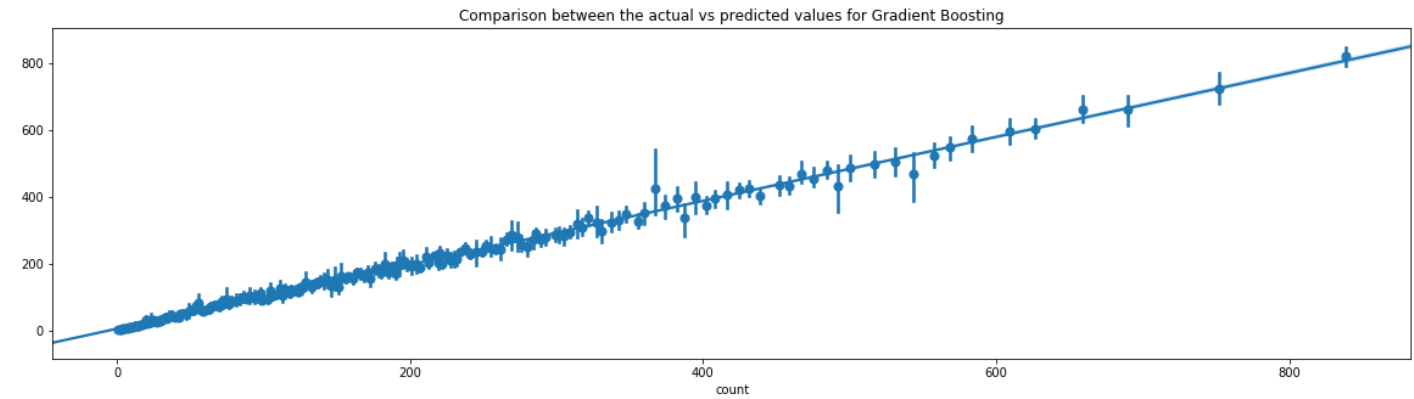

This was also what we used for the best submissions so far. Timing was greater than the previous models as it was calculated at 14s according to timeit.


### Other


#### SGDRegrssor and others

Other models that were tested (including, inter alia as appropriate) were the SGDRegressor, BayesianRidge, ARDRegression. All of those had similar results and surely enough, no improvements from the Gradient Boosting Model was done.


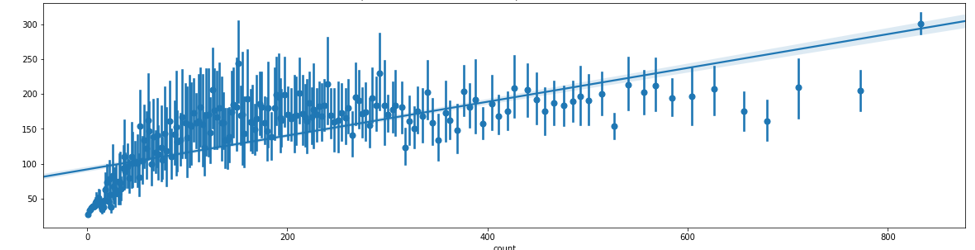


#### AdaBoost and Others

Others, like AdaBoostRegressor and ExtraTreesRegressor were better that the above, but still not better than gradient boosting model.


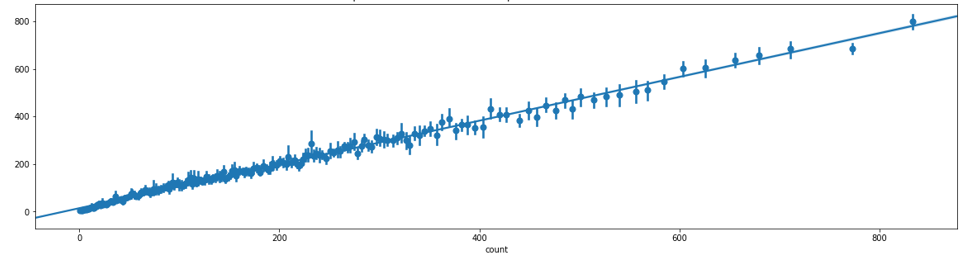


#### Naive Bayes Model & Logistic Regression

GaussianNB model performed worst that the Linear model with a RMSLE of nearly 2 (along with logistic regression)! Other models of the naive bayes module did not perform better either.

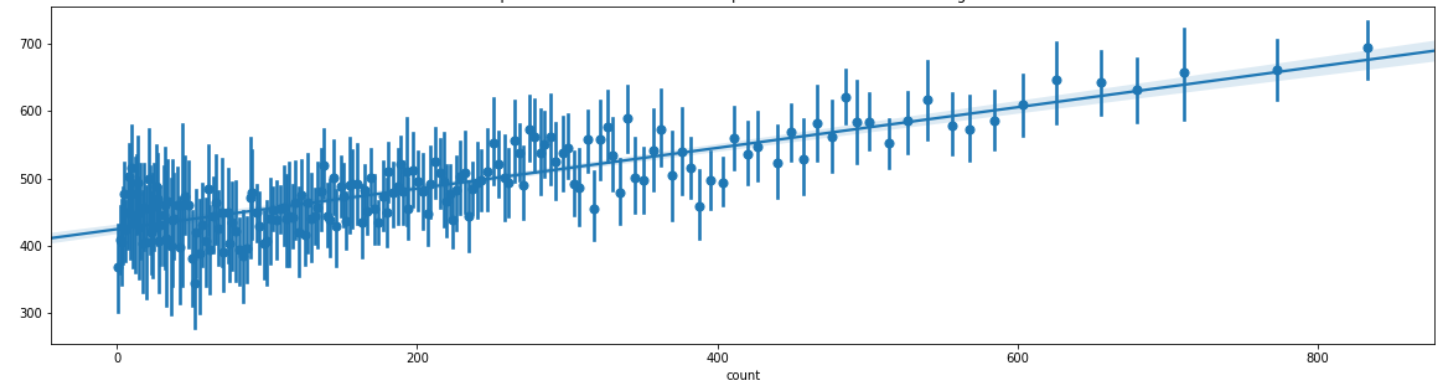


#### K-Nearest Neighbors

K-nearest neighbors were used with an iterator to define the best number of neighbors. 5 was set but still this was not enough to perform better that Gradient Boosting.

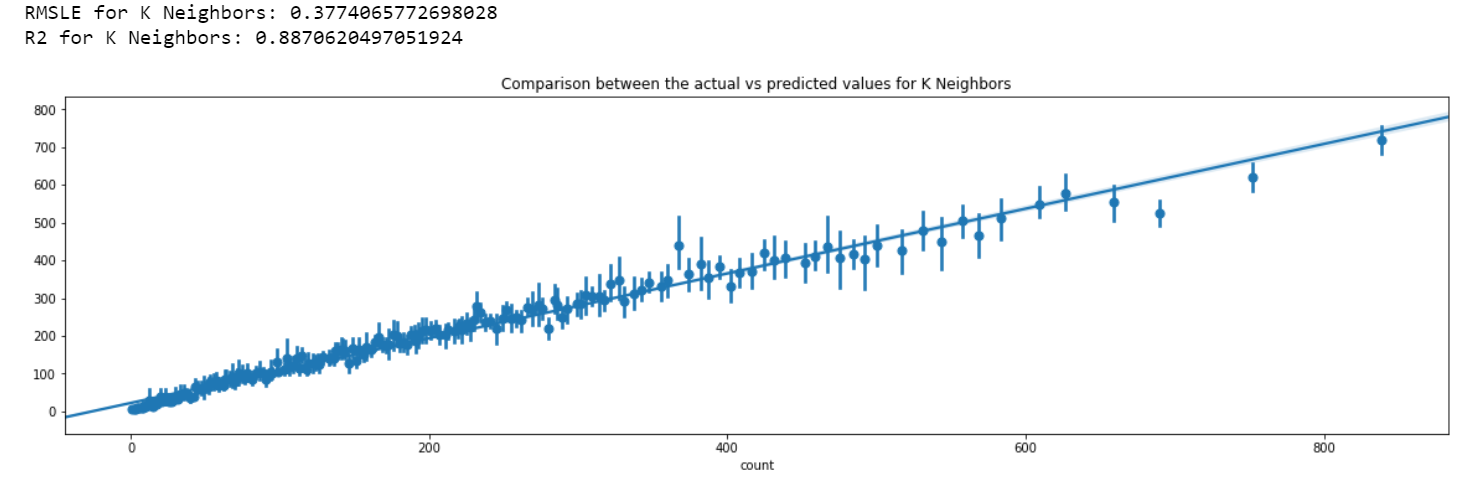


## Other improvements (After Model Selection)


### Use prior knowledge to remove features that don’t add important information

Through various tries and alterations of the features considered by the various models (indicatively at least 6 variations of features per model were tested) we concluded that considering all features produces the best results.


### Try ensemble models

Various ensemble models were tested as also mentioned above. We ended up using (inter alia) the GradientBoostingRegressor ensemble model.


### Train including all features

As mentioned above, all features were considered for the training as this was the way that we were achieving better results.


### Use regularization (L1 & L2)

Lasso and Ridge are L1 & L2 regularization models, which did not provide the best results.


### Dimensionality Reduction

Dimensionality reduction was not improving much the models (the improvement was less than 0.01 of the RMSLE). PCA was mainly used.

This was also expected as redundant features were dropped beforehand and therefore dimensionality reduction has little impact.


### Gradient Boosting & RandomForest values for alpha, n_estimators and learning rate

The parameters such as alpha, n_estimators and learning rate were checked based on the feedback received from a for loop (available in Annex II).

Though due to the time needed to check multiple parameters (e.g. alpha, n_estimators, learning rate, max depth, etc.) the step of the for loops had to be big enough (as an indication a for loop was running overnight and was not fully concluded on the morning). GridSearchCV achieved better results.


### GridSearchCV

GridSearchCV gave better results for both GradientBoosting and RandomForest. According to GridSearchCV best values, values for max_depth and n_estimators changed accordingly for both models.

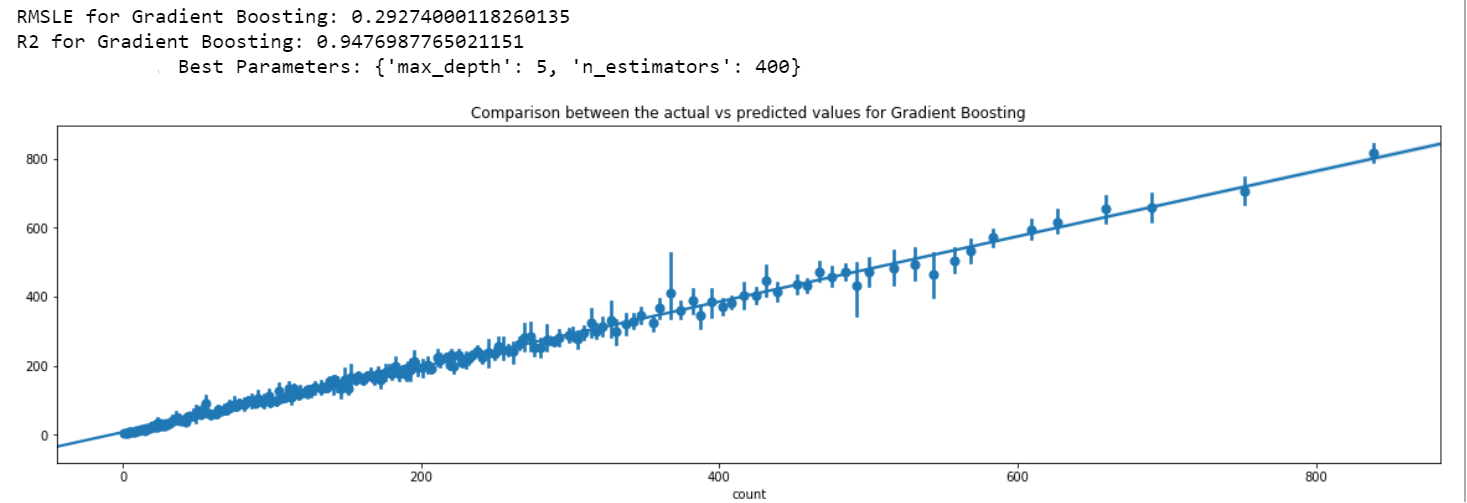


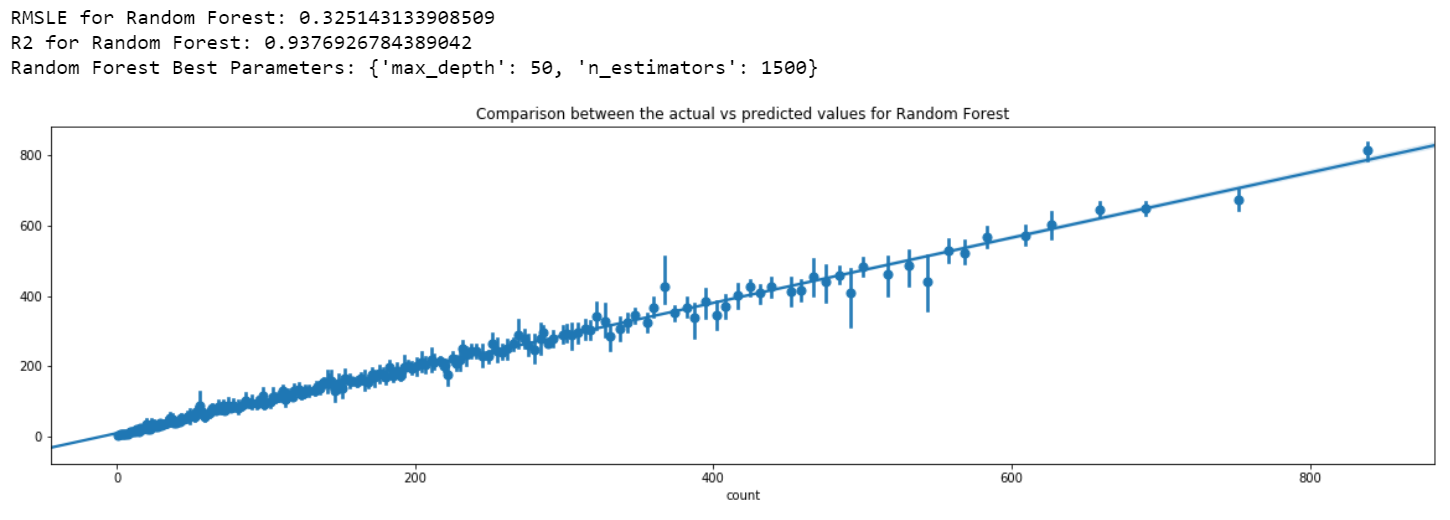


### Voting & Stacking


#### Voting

Voting was used with two models of Gradient Boosting and one of Random Forest (best value parameters were determined again by GridSearchCV). A better score than before was achieved, as per below, but also this was not the best score achieved.

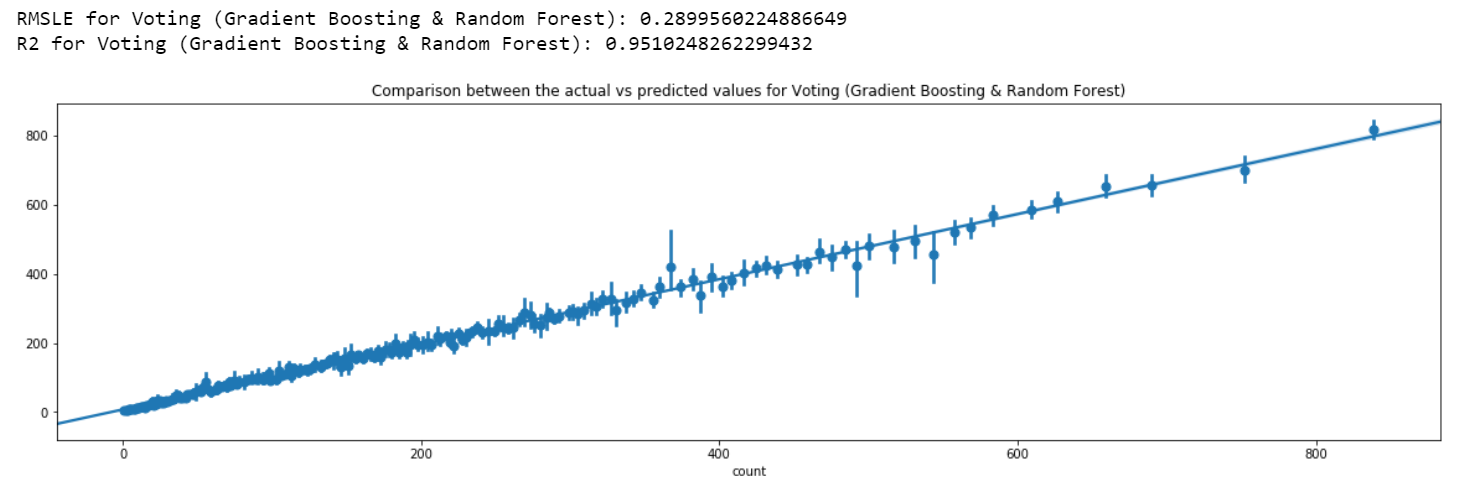


Weights were also fine-tuned through GridSearchCV, but the results were not satisfying either

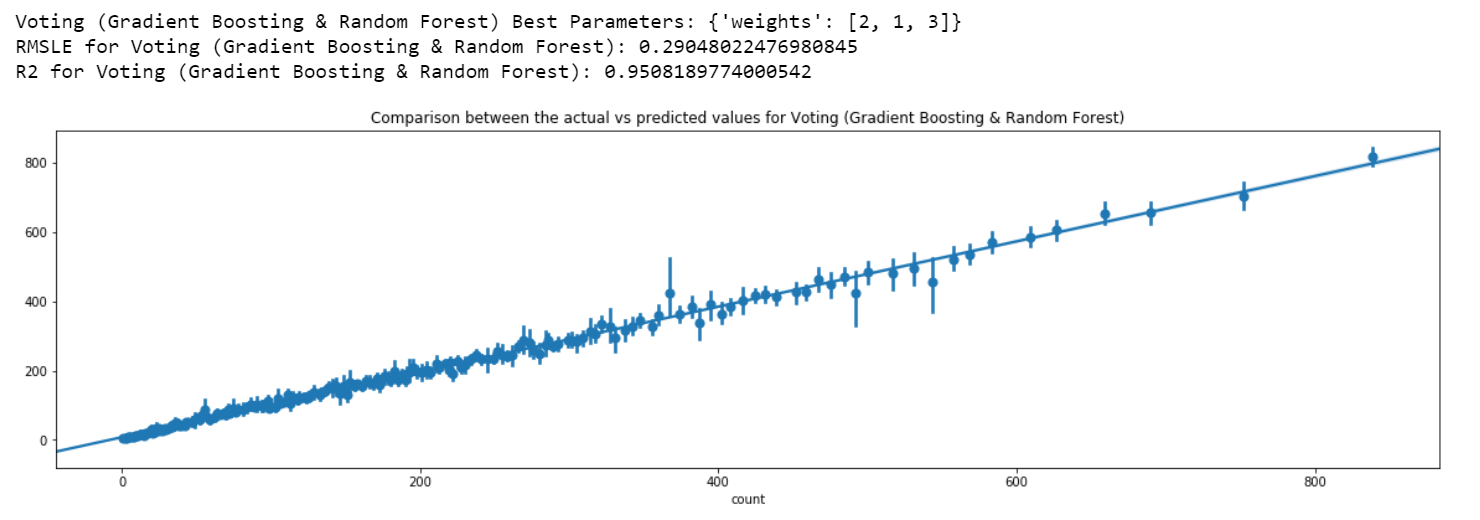


#### Stacking

Stacking on the other hand generally produced better results. We tested stacking with multiple models and the most successful was the one with two different GradientBoosting models, one Random Forest model and one SVR model and one ExtraTrees model. By inserting a final estimator, the results were becoming worse than with no final estimator (with passthrough enabled or not). Time needed for the code to run on the full dataset is a little bit over 28 minutes. The results are shown below:

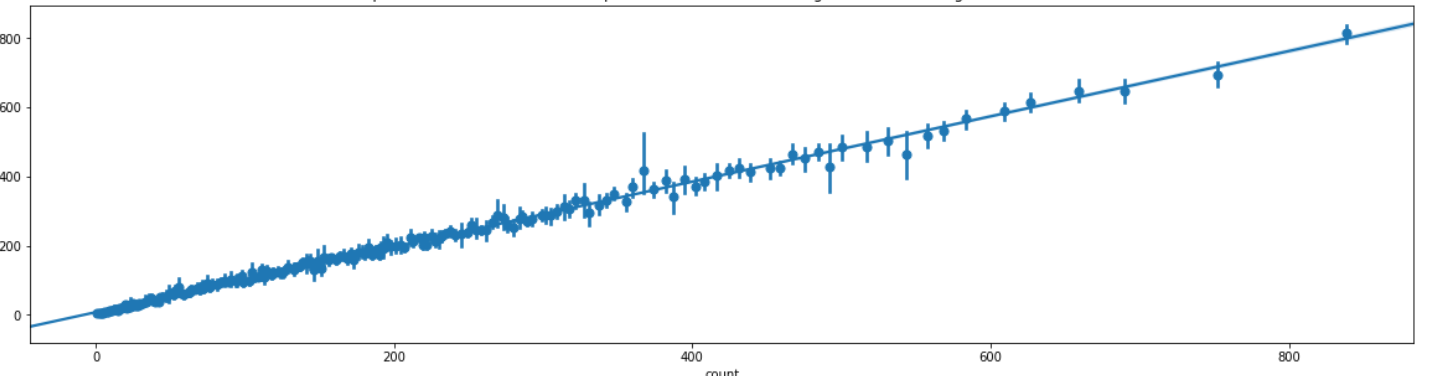


## Results

The best learning model that we achieved for this project with this dataset is the stacking model by considering all features. Stacking was performed with multiple models and the most successful was the one with two different GradientBoosting models, one Random Forest model, one SVR model and one ExtraTreesRegressor.

This model fits well for both the training and test sets and is not over fitting as per below:

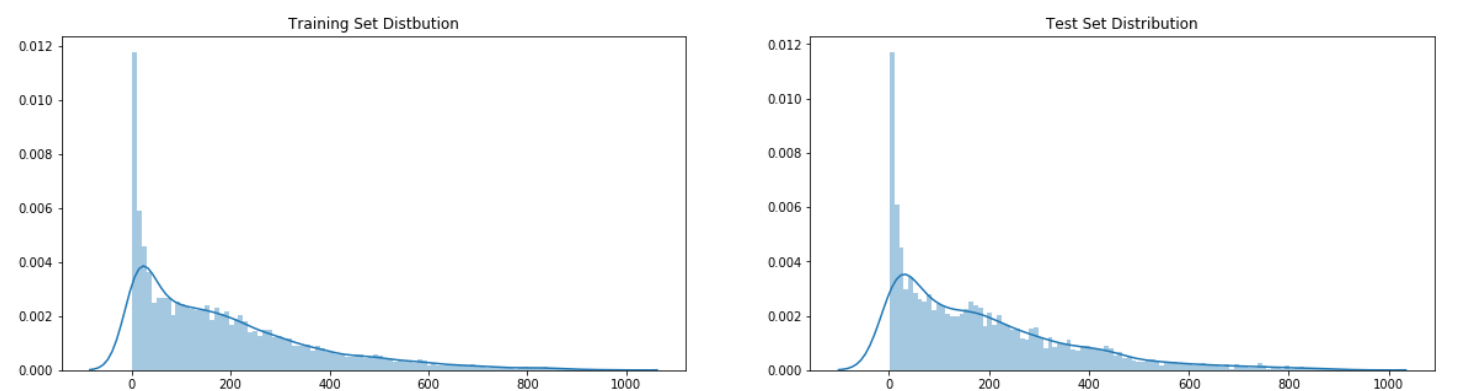

Generally, it seems like by building up on stacking regressor with multiple different models improves accuracy, but it should be expected that processing time will become greater while building up.

Code quality (the basics) was also considered. The below code achieves code quality of 10.00/10 according to [Pylint](https://www.pylint.org/)

--- 1711.3598918914795 seconds ---


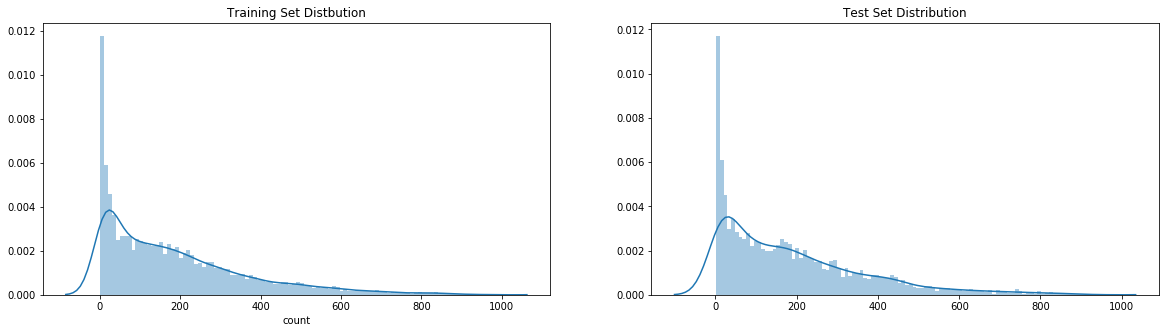

In [42]:
'''
Purpose:

We are given a dataset which contains the hourly count of bike rentals over a period of 12,165 hours
distributed in 731 days and we need to predict how many bikes will be rented each hour of the day,
using various prediction models and techniques.

Approach:
The best learning model that we achieved for this project with this dataset is the stacking model
 considering all features. Stacking was performed Stacking on the other hand generally produced
 better results. We tested stacking with multiple regressors and the most successful was the
 one with two different GradientBoosting models, one Random Forest model, one SVR model
 , one ExtraTreesRegressor.

This model fits well for both the training and test sets and is not over fitting
'''
# Pylint score is 10.00/10

# Importing Needed Libraries

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR

# Reading dataset

TRAIN_DS = pd.read_csv('train.csv')  # Training dataset

# Preparing data
# Changing column names for better reading

TRAIN_DS.rename(columns={'weathersit':'weather',
                         'mnth':'month',
                         'hr':'hour',
                         'yr':'year',
                         'hum': 'humidity',
                         'cnt':'count',
                         'temp':'temperature'}, inplace=True)

# Some data types need to be changed from numerical to categorical
# in order for the model to interpret better these variables.

TRAIN_DS['season'] = TRAIN_DS.season.astype('category')
TRAIN_DS['year'] = TRAIN_DS.year.astype('category')
TRAIN_DS['month'] = TRAIN_DS.month.astype('category')
TRAIN_DS['hour'] = TRAIN_DS.hour.astype('category')
TRAIN_DS['holiday'] = TRAIN_DS.holiday.astype('category')
TRAIN_DS['weekday'] = TRAIN_DS.weekday.astype('category')
TRAIN_DS['workingday'] = TRAIN_DS.workingday.astype('category')
TRAIN_DS['weather'] = TRAIN_DS.weather.astype('category')
TRAIN_DS['temperature'] = TRAIN_DS.temperature.astype('category')

# Dropping not needed categories

TRAIN_DS = TRAIN_DS.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)

# Submitting all features for predictions

X = TRAIN_DS[["season", "holiday", "workingday", "weather", "weekday",
              "month", "year", "hour", 'humidity', 'temperature']]

Y = TRAIN_DS['count']

# Creating a list for the models that we will use as estimators - best based on GridSearchCV

ESTIMATORS = [('randf', RandomForestRegressor(max_depth=50, n_estimators=1500)),
              ('gradb', GradientBoostingRegressor(max_depth=5, n_estimators=400)),
              ('gradb2', GradientBoostingRegressor(n_estimators=4000)),
              ('svr', SVR('rbf', gamma='auto')),
              ('ext', ExtraTreesRegressor(n_estimators=4000))]

# Creating the model from the estimators

STACKING = StackingRegressor(ESTIMATORS)

# Fitting the model

STACKING.fit(X, y=np.log1p(Y))

# Creating submission file

# Reading file

DF_TEST = pd.read_csv('test.csv')

# Preparing data
# Changing column names for better reading

DF_TEST.rename(columns={'weathersit':'weather',
                        'mnth':'month',
                        'hr':'hour',
                        'yr':'year',
                        'hum': 'humidity',
                        'cnt':'count',
                        'temp':'temperature'}, inplace=True)

# Some data types need to be changed from numerical to categorical
#in order for the model to interpret better these variables.

DF_TEST['season'] = DF_TEST.season.astype('category')
DF_TEST['year'] = DF_TEST.year.astype('category')
DF_TEST['month'] = DF_TEST.month.astype('category')
DF_TEST['hour'] = DF_TEST.hour.astype('category')
DF_TEST['holiday'] = DF_TEST.holiday.astype('category')
DF_TEST['weekday'] = DF_TEST.weekday.astype('category')
DF_TEST['workingday'] = DF_TEST.workingday.astype('category')
DF_TEST['weather'] = DF_TEST.weather.astype('category')
DF_TEST['temperature'] = DF_TEST.temperature.astype('category')

# Dropping not needed categories

DF_TEST = DF_TEST.drop(['atemp', 'windspeed'], axis=1)
DF_TEST = DF_TEST[["season", "holiday", "workingday", "weather", "weekday",
                   "month", "year", "hour", 'humidity', 'temperature']]

# Making predictions

Y_PRED = STACKING.predict(DF_TEST)
PREDICTIONS = np.exp(Y_PRED)

# Removing 0's

for i, y  in enumerate(PREDICTIONS):
    if Y_PRED[i] < 0:
        Y_PRED[i] = 0

# Creating submission file

SUBMISSION = pd.DataFrame()
SUBMISSION['Id'] = range(PREDICTIONS.shape[0])
SUBMISSION['Predicted'] = PREDICTIONS
SUBMISSION.to_csv("submission.csv", index=False)

# Creating distribution graph

Y = TRAIN_DS['count']
GRAPH, (TRN, TST) = plt.subplots(ncols=2)
GRAPH.set_size_inches(20, 5)
sn.distplot(Y, ax=TRN, bins=100)
sn.distplot(PREDICTIONS, ax=TST, bins=100)
TRN.set(title="Training Set Distbution")
TST.set(title="Test Set Distribution")


# ANNEX I Most successfull approaches